In [1]:
import numpy as np

#加载数据
data = np.loadtxt(fname='./线性数据.csv', delimiter='\t')

#标准化
data -= data.mean(axis=0)
data /= data.std(axis=0)

x = data[:, :-1]
y = data[:, -1]

x.shape, y.shape

((1503, 5), (1503,))

In [2]:
#常量
N, M = x.shape

#变量
w = np.ones(M)
b = 0

In [3]:
#预测函数
def predict(x):
    return w.dot(x) + b


predict(x[0])

0.6590042695516539

In [4]:
#求loss,MSELoss
def get_loss():
    loss = 0
    for i in range(N):
        pred = predict(x[i])
        loss += (pred - y[i])**2
    return loss / N


get_loss()

7.367867692433937

In [5]:
def get_gradient():
    global w
    global b

    eps = 1e-3

    loss_before = get_loss()

    gradient_w = np.empty(M)
    for i in range(M):
        w[i] += eps
        loss_after = get_loss()
        w[i] -= eps
        gradient_w[i] = (loss_after - loss_before) / eps

    b += eps
    loss_after = get_loss()
    b -= eps
    gradient_b = (loss_after - loss_before) / eps

    return gradient_w, gradient_b


get_gradient()

(array([2.03668543, 2.38225639, 1.02215384, 2.13526642, 3.22327899]),
 0.0010000000036924916)

In [6]:
plt_x = []
plt_y = []
for i in range(500):
    gradient_w, gradient_b = get_gradient()
    w -= gradient_w * 1e-2
    b -= gradient_b * 1e-2

    plt_x.append(i)
    plt_y.append(get_loss())

    if i % 50 == 0:
        print(i, get_loss())

0 7.112757670092038
50 1.7854577366414703
100 0.8188794143216034
150 0.5927178198131446
200 0.5305917673804184
250 0.5095310094726683
300 0.5002280440367376
350 0.4950505954913211
400 0.49174823787396005
450 0.48950848092220356


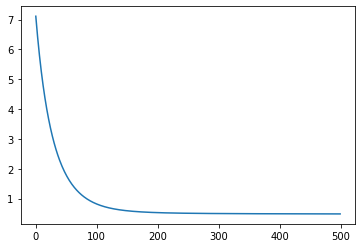

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(plt_x, plt_y)
plt.show()